In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace
import mesa
from mesa.datacollection import DataCollector
import numpy as np
from statistics import mean 
import pandas as pd
import collections

In [37]:
def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]

In [38]:
class MyAgent(Agent):
    
    def __init__(self, name, model,pos,dest=None, choi= None):
        super().__init__(name, model)
        self.name = name
        self.pos= pos
        self.neigh=None
        self.neigh_names=None
        self.heading=None
        self.dest=dest
        self.choices = choi
        self.posl1=None
        
    def neigh_namer(self, neigh):
        me = self.name
        them = (n.name for n in neigh)
        Names = []
        for other in them:
            Names.append(other)
        return Names  
    def dest_adjuster(self):
        m1 = self.heading
        if m1==(0,0):
            kk=np.array([[10,90],[55,55],[90,10],[10,10]])
            jj=kk[np.random.choice(len(kk),1)]
            m2=np.array((jj[0][0],jj[0][1]))
        else:
            m2=self.dest
        return m2


    def step(self):
        neigh = self.model.space.get_neighbors(self.pos, 3, False)
        self.neigh=neigh
        self.neigh_names=self.neigh_namer(neigh)
        self.heading=self.model.space.get_heading(self.pos, self.dest)
        self.posl1=self.pos
        self.dest=self.dest_adjuster()
        new_step =[round(x/y) for x, y in zip([ x for x in self.heading], [ abs(x)+0.000001 for x in self.heading])]
        new_pos = (self.pos[0]+new_step[0],self.pos[1]+new_step[1])
        print("{} activated".format(self.name))
        self.model.space.move_agent(self, new_pos)

In [39]:
class MyModel(Model):
    
    def __init__(self, n_agents,xylim=200, prob=0.05,):
        super().__init__()
        self.schedule = RandomActivation(self)
        self.space = ContinuousSpace(xylim, xylim, torus=False)
        for i in range(n_agents):
            pos = (self.random.randrange(0, 100), self.random.randrange(0, 100))
            choices=np.array([[90,90],[55,55],[90,10],[10,10]])
            choi=choices[np.random.choice(len(choices),1)]
            dest=np.array((choi[0][0],choi[0][1]))
            a = MyAgent(i, self,pos, dest,choi)
            self.schedule.add(a)
            self.space.place_agent(a, pos)
            self.dest=dest
            self.choices=choi
            self.dc = DataCollector(model_reporters={"agent_count":
                                    lambda m: m.schedule.get_agent_count()},
                                #agent_reporters={"neigh": lambda a: [a.neigh, a.name] }
                                agent_reporters={"neigh": lambda a: a.neigh_names,
                                                "name": lambda a: a.name,
                                                "pos": lambda a: a.pos,
                                                "posl1": lambda a: a.posl1,
                                                "heading": lambda a: a.heading,
                                                "choice": lambda a: a.choices}
                                   )

    def step(self):
        self.schedule.step()
        self.dc.collect(self)

In [40]:
nagent=30
nstep=200

In [41]:
model = MyModel(nagent)
for t in range(nstep):
    model.step()
model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()


model_df

26 activated
6 activated
1 activated
17 activated
8 activated
27 activated
24 activated
28 activated
11 activated
4 activated
15 activated
2 activated
18 activated
7 activated
20 activated
13 activated
16 activated
10 activated
29 activated
5 activated
19 activated
9 activated
3 activated
0 activated
22 activated
14 activated
12 activated
25 activated
23 activated
21 activated
7 activated
29 activated
28 activated
9 activated
12 activated
6 activated
3 activated
27 activated
13 activated
18 activated
25 activated
4 activated
24 activated
1 activated
17 activated
23 activated
15 activated
20 activated
14 activated
11 activated
22 activated
5 activated
10 activated
26 activated
2 activated
19 activated
21 activated
16 activated
0 activated
8 activated
13 activated
0 activated
10 activated
25 activated
24 activated
29 activated
19 activated
3 activated
21 activated
9 activated
6 activated
2 activated
27 activated
1 activated
4 activated
23 activated
7 activated
11 activated
22 activated
1

2 activated
20 activated
19 activated
13 activated
7 activated
17 activated
27 activated
9 activated
6 activated
15 activated
21 activated
5 activated
14 activated
21 activated
28 activated
29 activated
23 activated
10 activated
6 activated
7 activated
11 activated
0 activated
1 activated
15 activated
12 activated
22 activated
4 activated
27 activated
19 activated
16 activated
17 activated
3 activated
20 activated
25 activated
13 activated
24 activated
18 activated
5 activated
14 activated
2 activated
26 activated
8 activated
9 activated
13 activated
10 activated
26 activated
20 activated
28 activated
8 activated
12 activated
15 activated
0 activated
1 activated
5 activated
17 activated
11 activated
4 activated
14 activated
9 activated
23 activated
29 activated
25 activated
7 activated
18 activated
2 activated
22 activated
24 activated
6 activated
27 activated
3 activated
21 activated
16 activated
19 activated
3 activated
27 activated
24 activated
26 activated
8 activated
7 activated
1

3 activated
4 activated
9 activated
18 activated
7 activated
13 activated
12 activated
6 activated
25 activated
1 activated
29 activated
15 activated
11 activated
21 activated
3 activated
14 activated
8 activated
19 activated
24 activated
10 activated
16 activated
27 activated
22 activated
17 activated
5 activated
4 activated
26 activated
20 activated
2 activated
28 activated
23 activated
9 activated
0 activated
0 activated
19 activated
21 activated
16 activated
14 activated
29 activated
18 activated
17 activated
5 activated
27 activated
4 activated
1 activated
26 activated
2 activated
15 activated
25 activated
8 activated
10 activated
20 activated
6 activated
22 activated
7 activated
24 activated
11 activated
28 activated
13 activated
9 activated
23 activated
12 activated
3 activated
19 activated
21 activated
5 activated
23 activated
16 activated
6 activated
3 activated
15 activated
17 activated
24 activated
13 activated
29 activated
14 activated
2 activated
7 activated
1 activated
28

19 activated
13 activated
20 activated
9 activated
6 activated
29 activated
0 activated
8 activated
18 activated
21 activated
11 activated
12 activated
15 activated
23 activated
24 activated
28 activated
26 activated
10 activated
2 activated
10 activated
18 activated
21 activated
1 activated
27 activated
26 activated
15 activated
4 activated
14 activated
17 activated
5 activated
16 activated
20 activated
7 activated
11 activated
24 activated
28 activated
6 activated
25 activated
0 activated
22 activated
19 activated
9 activated
13 activated
29 activated
23 activated
8 activated
3 activated
12 activated
16 activated
10 activated
2 activated
27 activated
9 activated
12 activated
29 activated
22 activated
26 activated
4 activated
13 activated
21 activated
17 activated
19 activated
18 activated
15 activated
28 activated
0 activated
3 activated
24 activated
5 activated
8 activated
11 activated
25 activated
20 activated
14 activated
1 activated
23 activated
6 activated
7 activated
8 activate

17 activated
2 activated
12 activated
16 activated
23 activated
10 activated
22 activated
25 activated
11 activated
15 activated
6 activated
14 activated
24 activated
8 activated
5 activated
29 activated
3 activated
1 activated
0 activated
7 activated
26 activated
27 activated
18 activated
4 activated
29 activated
13 activated
19 activated
17 activated
3 activated
11 activated
18 activated
27 activated
15 activated
26 activated
24 activated
20 activated
16 activated
25 activated
8 activated
10 activated
1 activated
23 activated
0 activated
12 activated
5 activated
6 activated
28 activated
14 activated
2 activated
9 activated
21 activated
4 activated
22 activated
7 activated
4 activated
3 activated
27 activated
15 activated
11 activated
6 activated
22 activated
2 activated
24 activated
10 activated
29 activated
28 activated
17 activated
12 activated
18 activated
26 activated
14 activated
13 activated
9 activated
0 activated
8 activated
19 activated
25 activated
5 activated
1 activated
2

,agent_count
0,30
1,30
2,30
3,30
4,30
...,...
195,30
196,30
197,30
198,30


In [42]:
agent_df["neigh"]

Step  AgentID
1     0           []
      1           []
      2           []
      3           []
      4           []
                ... 
200   25         [2]
      26          []
      27          []
      28          []
      29          []
Name: neigh, Length: 6000, dtype: object

In [43]:
def populate (df, vec):
    for v in vec:
        kk=np.array(v).tolist()
        x=int(max(0, kk[0]-1))
        y=int(max(0, kk[1]-1))
        df [x,y]=1
    return df

In [46]:
dat=np.zeros((100,100))
dats=[]
for i in range(nstep):
    a=[j for j in range(0+(i*nagent),(nagent+(i*nagent)))]
    vec=agent_df["posl1"].values[a]
    dat=np.zeros((100,100))
    dats.append(populate (dat,vec))
    print (i+ (i-1) )

-1
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
301
303
305
307
309
311
313
315
317
319
321
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351
353
355
357
359
361
363
365
367
369
371
373
375
377
379
381
383
385
387
389
391
393
395
397


<IPython.core.display.Javascript object>


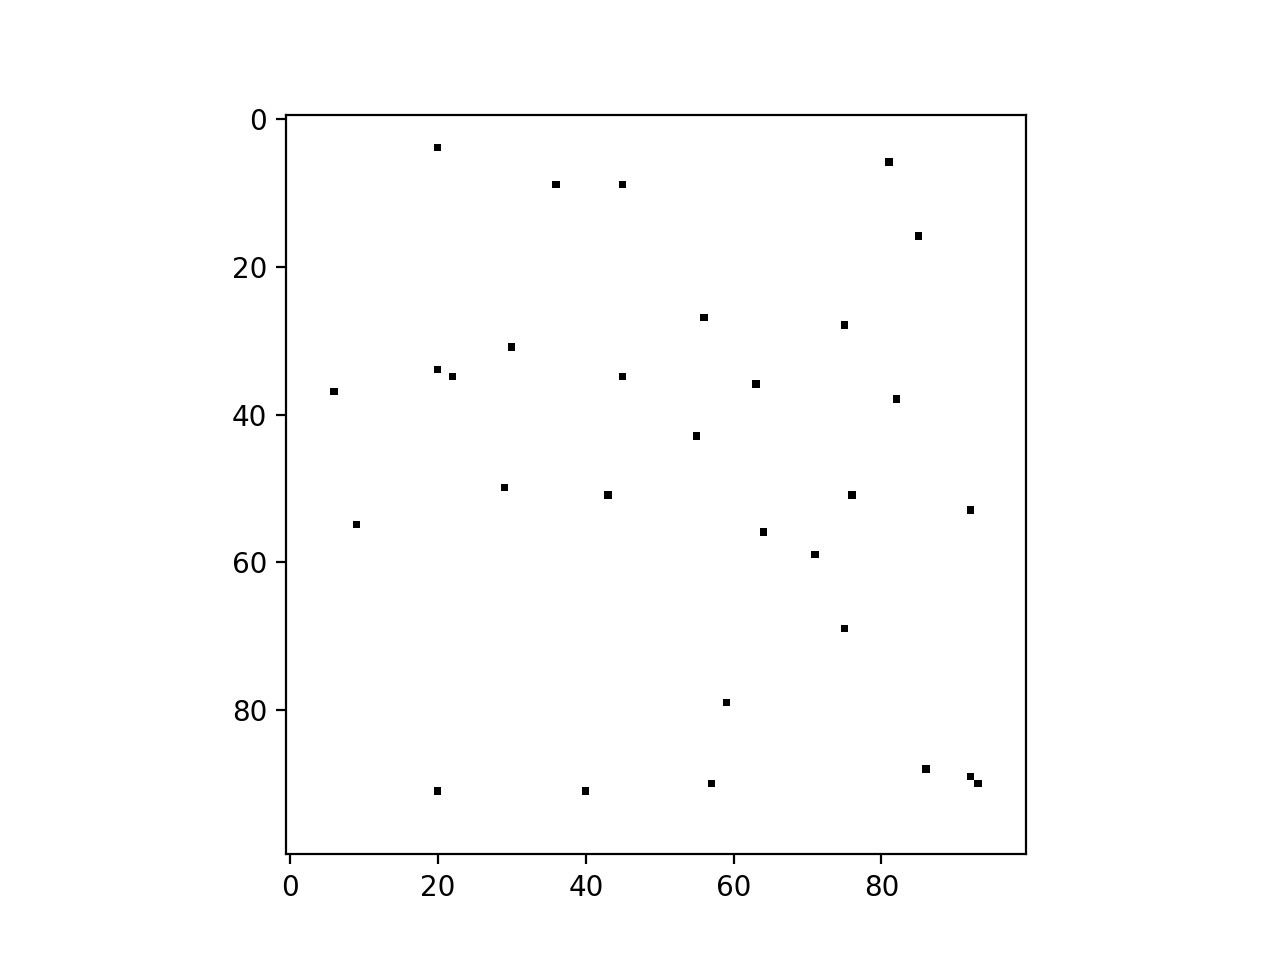

In [45]:
from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0,.05,1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(nstep):
    data = dats[i] 
    ax.imshow(data, cmap=cmap, norm=norm)
    camera.snap()
animation = camera.animate()